## Problem Statement
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

Importing Libraries¶

In [ ]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import keras
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

### Installing Tensor Flow

In [ ]:
#pip install tensorflow

# Importing CSV File

In [ ]:
df=pd.read_csv('forestfires.csv')

# EDA

In [ ]:
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [ ]:
# for talking the datatype and null value information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
df.size_category.unique()

array(['small', 'large'], dtype=object)

In [ ]:
label_encoder=preprocessing.LabelEncoder()

In [ ]:
df.size_category=label_encoder.fit_transform(df.size_category)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
df['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

# Feature Engineering

In [ ]:
df2=df.drop(columns=(['month','day']),axis=1)

In [ ]:
df2.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthfeb  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0              1  
1         0              1  
2         0              1  
3         0              1  
4         0              1  

[5 rows x 29 columns]

In [ ]:
df2.shape

(517, 29)

In [ ]:
    df2.duplicated().sum()

8

In [ ]:
df2=df2.drop_duplicates()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           509 non-null    float64
 1   DMC            509 non-null    float64
 2   DC             509 non-null    float64
 3   ISI            509 non-null    float64
 4   temp           509 non-null    float64
 5   RH             509 non-null    int64  
 6   wind           509 non-null    float64
 7   rain           509 non-null    float64
 8   area           509 non-null    float64
 9   dayfri         509 non-null    int64  
 10  daymon         509 non-null    int64  
 11  daysat         509 non-null    int64  
 12  daysun         509 non-null    int64  
 13  daythu         509 non-null    int64  
 14  daytue         509 non-null    int64  
 15  daywed         509 non-null    int64  
 16  monthapr       509 non-null    int64  
 17  monthaug       509 non-null    int64  
 18  monthdec  

# Data Visualisation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep'),
  Text(28.5, 0, 'size_category')])

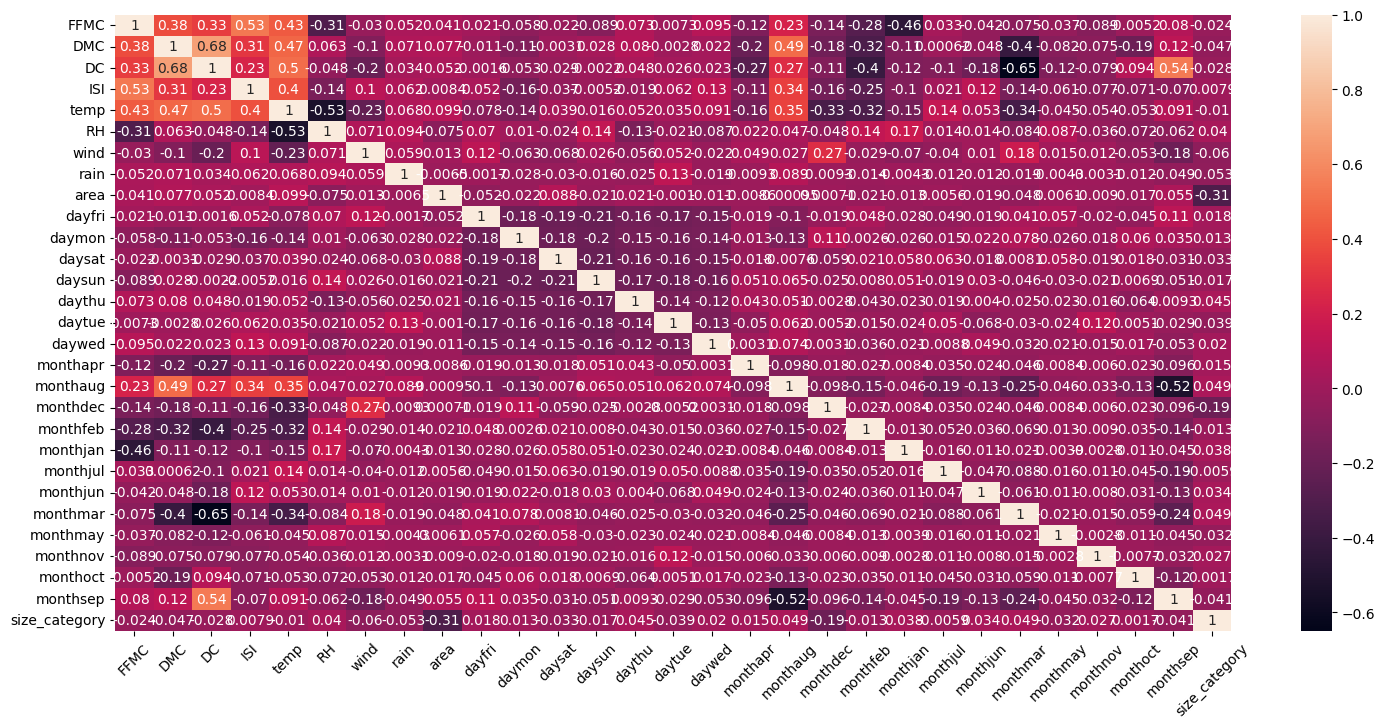

In [ ]:
# visualising the correlation
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df2.corr(), annot=True);
plt.xticks(rotation=45)

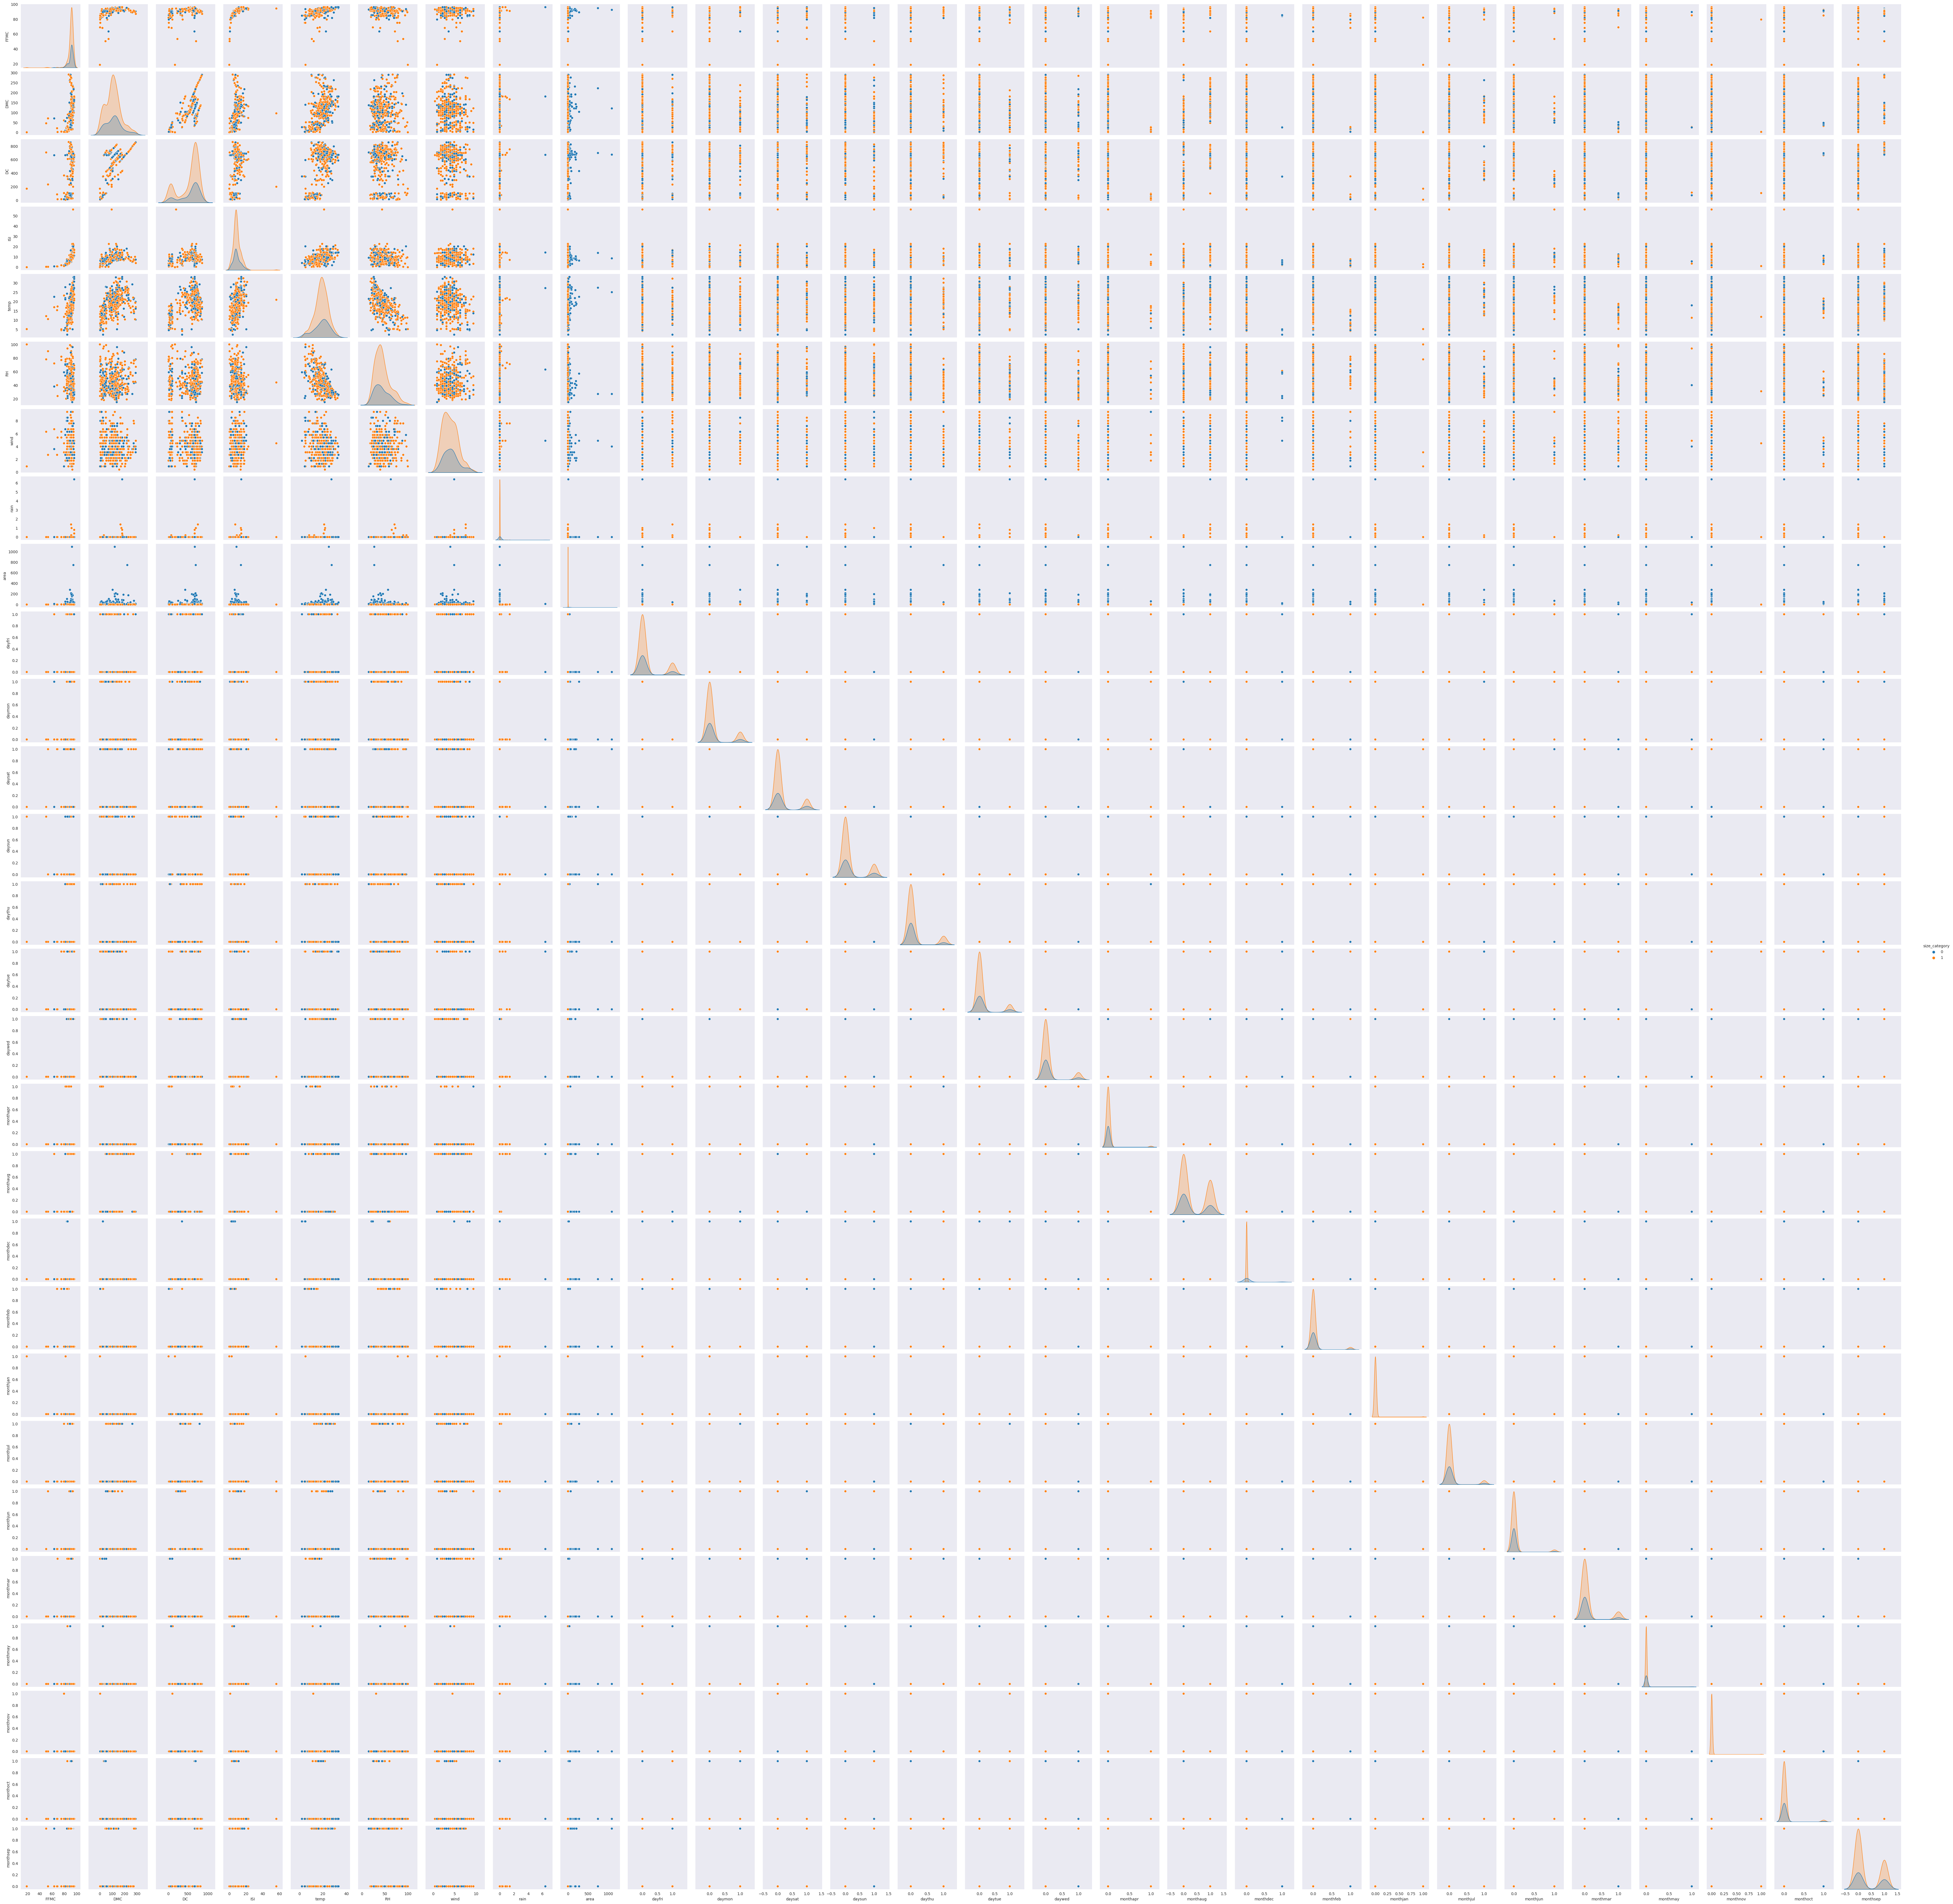

In [ ]:
# visualisation of all data
sns.set_style('dark')
sns.pairplot(df2, hue='size_category')
plt.show()

IndexError: ignored

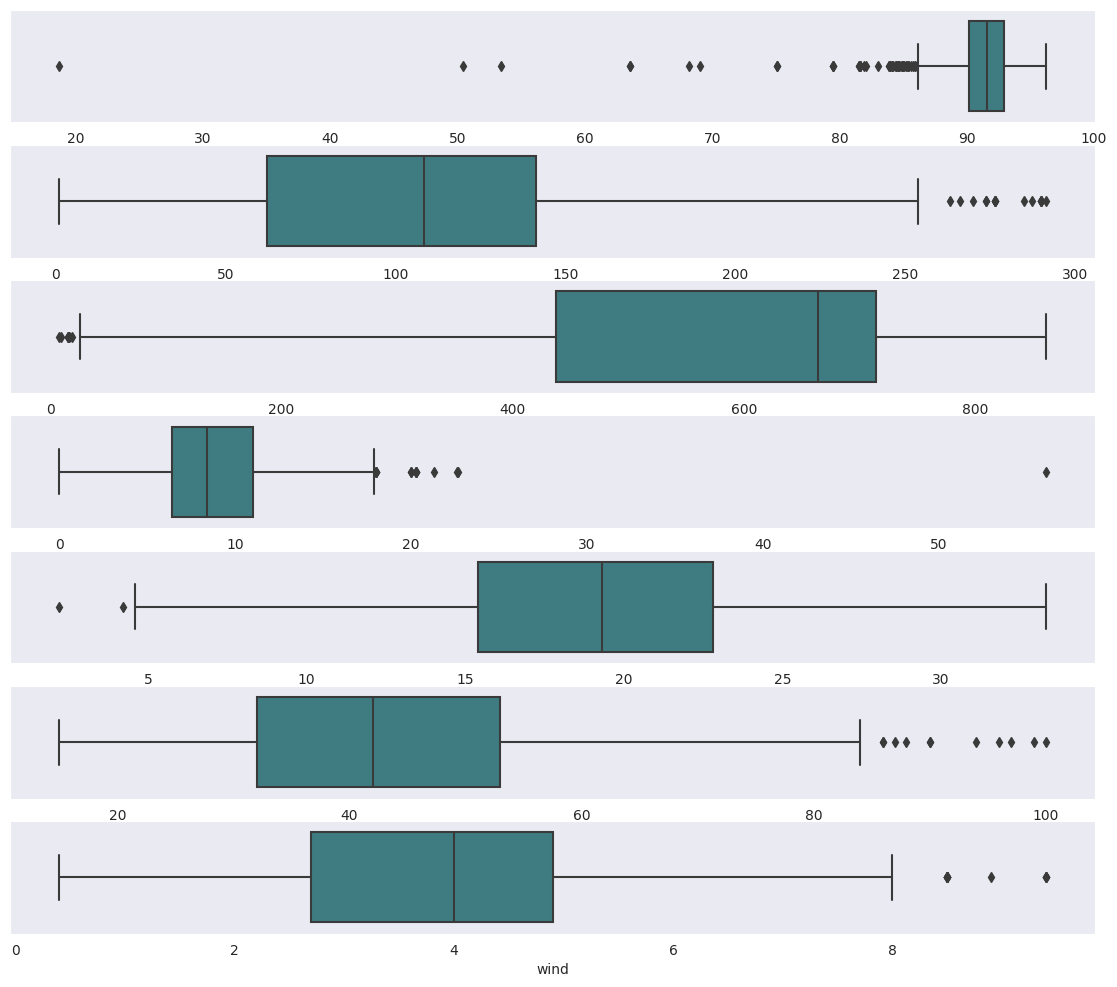

In [19]:
ot=df2.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='wind',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='rain',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

# Splitting data in X and Y

In [20]:
X=df2.iloc[:,0:-1]
X

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[509 rows x 28 columns]

In [21]:
Y=df2.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 509, dtype: int64

# Splitting data in train and test data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [23]:
import tensorflow as tf
mod=tf.keras.models.Sequential()
mod.add(tf.keras.layers.Dense(42,input_dim=28,activation='relu'))
mod.add(tf.keras.layers.Dense(28,activation='relu'))
mod.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [24]:
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                1218      
                                                                 
 dense_1 (Dense)             (None, 28)                1204      
                                                                 
 dense_2 (Dense)             (None, 1)                 29        
                                                                 
Total params: 2,451
Trainable params: 2,451
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile model
mod.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
x_train.shape

(356, 28)

In [27]:
y_train.shape

(356,)

In [28]:
# Training and evaluating the model
history=mod.fit(x_train, y_train, validation_data=(x_test,y_test),epochs =50, batch_size=10)

Epoch 1/50
36/36 [==============================] - 2s 14ms/step - loss: 1.0638 - accuracy: 0.6910 - val_loss: 0.4391 - val_accuracy: 0.8170
Epoch 2/50
36/36 [==============================] - 0s 7ms/step - loss: 0.5618 - accuracy: 0.8034 - val_loss: 0.5720 - val_accuracy: 0.6863
Epoch 3/50
36/36 [==============================] - 0s 7ms/step - loss: 0.6411 - accuracy: 0.8174 - val_loss: 0.7888 - val_accuracy: 0.8105
Epoch 4/50
36/36 [==============================] - 0s 6ms/step - loss: 0.6616 - accuracy: 0.7921 - val_loss: 0.2229 - val_accuracy: 0.8954
Epoch 5/50
36/36 [==============================] - 0s 6ms/step - loss: 0.3481 - accuracy: 0.8848 - val_loss: 0.3457 - val_accuracy: 0.8562
Epoch 6/50
36/36 [==============================] - 0s 7ms/step - loss: 0.2053 - accuracy: 0.9213 - val_loss: 0.1848 - val_accuracy: 0.9150
Epoch 7/50
36/36 [==============================] - 0s 7ms/step - loss: 0.2205 - accuracy: 0.9017 - val_loss: 0.3012 - val_accuracy: 0.8758
Epoch 8/50
36/36 [=

In [29]:
# evaluate the model
scores = mod.evaluate(x_train, y_train)
print("%s: %.2f%%" % (mod.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9719
accuracy: 97.19%


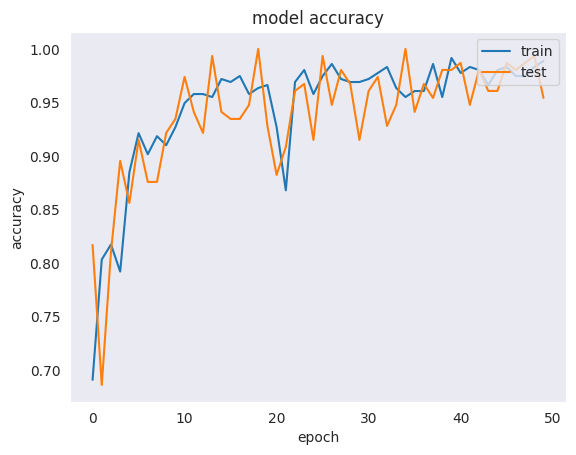

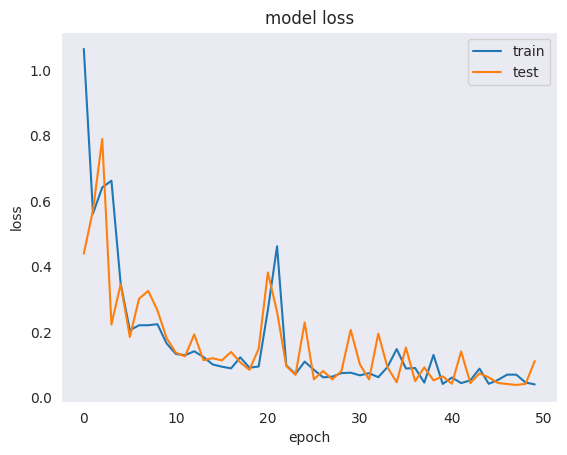

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [31]:
# evaluate the model

y_train_pred= mod.predict(x_train)
y_test_pred= mod.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse, test_rmse))

5/5 [==============================] - 0s 6ms/step
Training set rmse: 0.134, Testing set rmse: 0.192


# Inference
By seeing The mse and loss rate is very low and the acuracy of the model is very good.
So we can say that model is performing well for data.
So by seeing model we dont need to do hypertunning of the parameter